# Predicting Creditworthiness Using Random Forest

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Define column names based on the UCI documentation
column_names = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount", "Savings",
    "EmploymentSince", "InstallmentRate", "PersonalStatusSex", "OtherDebtors",
    "ResidenceSince", "Property", "Age", "OtherInstallmentPlans", "Housing",
    "ExistingCredits", "Job", "PeopleLiable", "Telephone", "ForeignWorker", "Target"
]

# Load the data (assuming the file is in the same directory as the script)
data = pd.read_csv("german.data", sep=' ', names=column_names)


In [6]:
print(data.head())
print(data.info())
print(data['Target'].value_counts())


  Status  Duration CreditHistory Purpose  CreditAmount Savings  \
0    A11         6           A34     A43          1169     A65   
1    A12        48           A32     A43          5951     A61   
2    A14        12           A34     A46          2096     A61   
3    A11        42           A32     A42          7882     A61   
4    A11        24           A33     A40          4870     A61   

  EmploymentSince  InstallmentRate PersonalStatusSex OtherDebtors  ...  \
0             A75                4               A93         A101  ...   
1             A73                2               A92         A101  ...   
2             A74                2               A93         A101  ...   
3             A74                2               A93         A103  ...   
4             A73                3               A93         A101  ...   

   Property Age  OtherInstallmentPlans Housing ExistingCredits   Job  \
0      A121  67                   A143    A152               2  A173   
1      A121  2

In [7]:
# 1 = Good Credit, 2 = Bad Credit
data['Target'] = data['Target'].map({1: 1, 2: 0})


In [8]:
categorical_cols = data.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])


In [9]:
scaler = StandardScaler()
numeric_cols = ['Duration', 'CreditAmount', 'Age']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [10]:
X = data.drop("Target", axis=1)
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.805
Confusion Matrix:
 [[ 31  28]
 [ 11 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.61        59
           1       0.82      0.92      0.87       141

    accuracy                           0.81       200
   macro avg       0.78      0.72      0.74       200
weighted avg       0.80      0.81      0.79       200



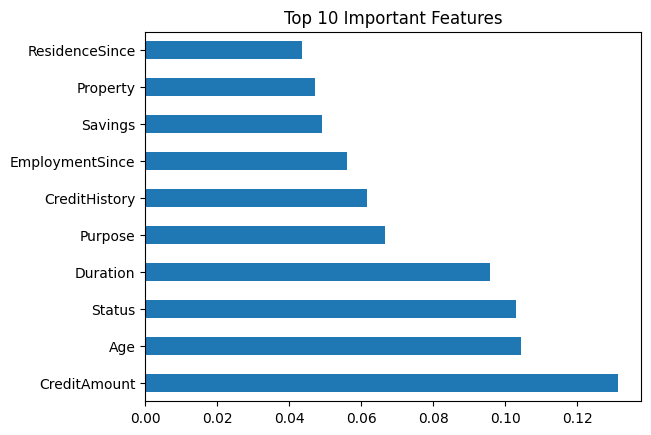

In [13]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()


In [14]:
import joblib
joblib.dump(rf, "credit_risk_rf.joblib")


['credit_risk_rf.joblib']

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

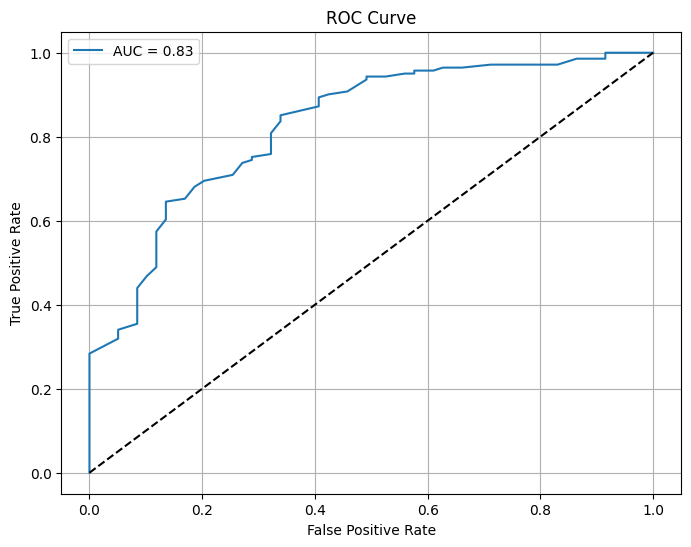

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_proba = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# Re-evaluate
y_pred_best = best_model.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Improved Accuracy: 0.78


In [18]:
import joblib
joblib.dump(best_model, "creditworthiness_rf_model.pkl")


['creditworthiness_rf_model.pkl']